In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.oauth2 import service_account
from google.cloud import bigquery

from datetime import datetime,timedelta

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile

from sklearn.model_selection import train_test_split

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV,cross_validate

from sklearn.metrics import classification_report


import ipdb

key_path = "/home/clementine/code/Clementinelalande/gcp/marbotic-4221eb142ed6.json"

credentials = service_account.Credentials.from_service_account_file(key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"])


# Grouping all infos on users in 1 table (user_final)



## Downloading all 3 tables related to users in BQ




In [2]:
def extract_users():
    # Construct a BigQuery client object.
    key_path = "/home/clementine/code/Clementinelalande/gcp/marbotic-4221eb142ed6.json"
    

    credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],)
    
    client = bigquery.Client(project="marbotic", credentials=credentials)

    query = """
        SELECT *
        FROM `marbotic.marbotic_dataset.user_properties`
    """

    query_job = client.query(query)  # Make an API request.
    results=query_job.result().to_dataframe() # Waits for job to complete.

    return pd.DataFrame(results)



In [3]:
def extract_user_id():
    # Construct a BigQuery client object.
    key_path = "/home/clementine/code/Clementinelalande/gcp/marbotic-4221eb142ed6.json"
    

    credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],)
    
    client = bigquery.Client(project="marbotic", credentials=credentials)

    query = """
        SELECT *
        FROM `marbotic.marbotic_dataset.user_id`
    """

    query_job = client.query(query)  # Make an API request.
    results=query_job.result().to_dataframe() # Waits for job to complete.

    return pd.DataFrame(results)


In [4]:
def extract_user_metrics():
    # Construct a BigQuery client object.
    key_path = "/home/clementine/code/Clementinelalande/gcp/marbotic-4221eb142ed6.json"
    

    credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],)
    
    client = bigquery.Client(project="marbotic", credentials=credentials)

    query = """
        SELECT *
        FROM `marbotic.marbotic_dataset.users_metrics`
        
    """

    query_job = client.query(query)  # Make an API request.
    results=query_job.result().to_dataframe() # Waits for job to complete.

    return pd.DataFrame(results)


In [5]:
users_properties = extract_users()

users_properties


,Newsletter,Type,Country,Language,ProfileType2,ReceiveNewsletter,LoggedIn,Products_Sesame_Street_Numbers,Products_Smart_Shapes,Products_Smart_Numbers,...,Games_Marbotic_Letters,Games_More_Or_Less,Games_Marbotic,Games_Vocabubble,event_id,client_event_time,user_creation_time,user_id,id,Products_Sensory_kit
0,False,Teacher,LU,English,None,None,None,0,0,0,...,0,0,0,0,1,2022-03-03 10:17:33.279000+00:00,2022-03-03 10:15:15.799000+00:00,0,38695,NaN
1,False,Teacher,LU,English,None,None,None,0,0,0,...,0,0,0,0,2,2022-03-03 10:17:33.279000+00:00,2022-03-03 10:15:15.799000+00:00,0,38696,NaN
2,False,Parent,AT,English,None,None,None,0,0,0,...,0,0,0,0,9,2022-03-04 18:10:45.671000+00:00,2021-05-12 14:48:12.149000+00:00,0,70424,NaN
3,False,Parent,AT,English,None,None,None,0,0,0,...,0,0,0,0,1,2022-03-04 18:09:42.747000+00:00,2021-05-12 14:48:12.149000+00:00,0,70686,NaN
4,False,Parent,AT,English,None,None,None,0,0,0,...,0,0,0,0,2,2022-03-04 18:09:42.748000+00:00,2021-05-12 14:48:12.149000+00:00,0,70687,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320224,True,Parent,CA,English,None,None,None,0,1,0,...,1,1,1,1,122,2022-05-13 00:03:46.899000+00:00,2021-10-12 00:49:57.340000+00:00,63728,1313882,0.0
1320225,True,Parent,CA,English,None,None,None,0,1,0,...,1,1,1,1,123,2022-05-13 00:03:58.233000+00:00,2021-10-12 00:49:57.340000+00:00,63728,1313883,0.0
1320226,True,Parent,CA,English,None,None,None,0,1,0,...,1,1,1,1,102,2022-05-13 00:00:35.906000+00:00,2021-10-12 00:49:57.340000+00:00,63728,1313884,0.0
1320227,True,Parent,CA,English,None,None,None,0,1,0,...,1,1,1,1,127,2022-05-13 00:05:47.672000+00:00,2021-10-12 00:49:57.340000+00:00,63728,1313885,0.0


In [6]:
user_id = extract_user_id()

user_id



,User_id,Attribution,Purchases_PY1Y,Purchases_PLY,Purchases_MEGR,Purchases_PLM,Purchases_ME1,Purchases_EY3M,Purchases_tier_upgrade_0_to_1,Purchases_PM3M,Purchases_MPGR,Purchases_EY1Y,Purchases_PY3M,purchases
0,71631,ELU,0,0,NaN,0,0,0,0,0,NaN,0,0,False
1,73665,ERU,0,0,NaN,0,0,0,0,0,NaN,0,0,False
2,73414,ERU,0,0,NaN,0,0,0,0,0,NaN,0,0,False
3,16477,ERU,0,0,NaN,0,0,0,0,0,NaN,0,0,False
4,17709,ERU,0,0,NaN,0,0,0,0,0,NaN,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13674,69765,PPU,0,0,0.0,0,0,0,1,0,0.0,0,0,True
13675,69860,PPU,0,0,0.0,0,0,0,1,0,0.0,0,0,True
13676,70095,ELU,0,0,0.0,0,0,1,0,0,0.0,0,0,True
13677,50495,PPU,0,0,0.0,0,0,0,1,0,0.0,0,0,True


In [7]:
user_id.nunique()

User_id                          12858
Attribution                         14
Purchases_PY1Y                       2
Purchases_PLY                        2
Purchases_MEGR                       2
Purchases_PLM                        2
Purchases_ME1                        2
Purchases_EY3M                       2
Purchases_tier_upgrade_0_to_1        2
Purchases_PM3M                       2
Purchases_MPGR                       2
Purchases_EY1Y                       2
Purchases_PY3M                       2
purchases                            2
dtype: int64

In [8]:
user_metrics = extract_user_metrics()

user_metrics



,user_id,client_event_time,city,language,os_version,region,country,device_model,start_version,user_creation_time,...,event_type_Profile_Delete,event_type_Profile_Reset_Settings_and_Progression,event_type_Profile_Update,event_type_Scaffolding_Reset,event_type_Scaffolding_Scaffolding,event_type_Scene_Enter,event_type_Scene_Leave,event_type_Toast_Appear,event_type_Toast_Disappear,purchases
0,72041.0,2022-04-01 20:45:46.891000+00:00,no_city,English,12.5.5,no_region,Iran,iPad Air,1.3.0,2022-04-01 20:03:09.286000+00:00,...,0.0,0.0,0.0,0.0,0.0,221.0,0.0,0.0,0.0,False
1,73163.0,2022-05-11 23:24:04.316000+00:00,no_city,English,15.2.1,no_region,Iran,iPad 5,2.0.6,2022-05-11 23:07:26.914000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,72030.0,2022-04-01 22:16:47.193000+00:00,Muscat,English,15.4.1,Muscat,Oman,iPad 6,1.3.0,2022-04-01 11:54:18.680000+00:00,...,0.0,0.0,0.0,0.0,0.0,23.0,9.0,0.0,0.0,False
3,65828.0,2022-04-06 23:52:57.543000+00:00,Lima,English,15.3.1,Lima,Peru,iPad Pro,1.0.1,2021-11-25 21:14:53.544000+00:00,...,0.0,0.0,0.0,0.0,0.0,14.0,7.0,0.0,0.0,False
4,71928.0,2022-04-09 01:00:45.402000+00:00,Lima,English,14.8.1,Lima,Peru,iPad Mini 5,1.3.0,2022-03-29 16:44:39.174000+00:00,...,0.0,0.0,0.0,0.0,0.0,27.0,7.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,50624.0,2022-04-09 10:14:52.893000+00:00,Dubai,English,14.8.1,Dubai,United Arab Emirates,"iPad11,6",9.1.0,2020-12-29 06:54:15.901000+00:00,...,0.0,0.0,0.0,0.0,0.0,35.0,45.0,0.0,0.0,False
2622,54360.0,2022-03-20 14:16:22.446000+00:00,Dubai,English,15.3.1,Dubai,United Arab Emirates,iPad Air 2,1.2.0,2021-02-23 12:34:34.944000+00:00,...,0.0,0.0,0.0,0.0,0.0,91.0,21.0,0.0,0.0,False
2623,72655.0,2022-04-22 16:11:00.120000+00:00,Ras al-Khaimah,English,14.8.1,Imarat Ra's al Khaymah,United Arab Emirates,iPad Air 3,4.0.1,2020-10-07 07:40:55.047000+00:00,...,0.0,0.0,0.0,0.0,0.0,42.0,19.0,0.0,0.0,False
2624,18557.0,2022-04-05 04:57:37.838000+00:00,Dubai,Spanish,12.5.5,Dubai,United Arab Emirates,iPad Air,1.3.0,2022-04-03 06:36:36.939000+00:00,...,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,False


## Preparing users_properties for merge (1.3m lines, to group by user_id)









In [9]:
users_properties.columns


Index(['Newsletter', 'Type', 'Country', 'Language', 'ProfileType2',
       'ReceiveNewsletter', 'LoggedIn', 'Products_Sesame_Street_Numbers',
       'Products_Smart_Shapes', 'Products_Smart_Numbers',
       'Products_Smart_Letters', 'Products_Deluxe_Learning_Kit',
       'Products_Nordic_Kit', 'Products_Smart_Letters_Lowercase',
       'Products_Smart_Kit', 'Pieces_Uppercase_Letters',
       'Pieces_Lowercase_Letters', 'Pieces_Sesame_Street_Numbers',
       'Pieces_Numbers', 'Pieces_English', 'Pieces_Nordic_Letters',
       'Pieces_Shapes', 'Games_Marbotic_Numbers', 'Games_Alphamonster',
       'Games_10_Fingers', 'Games_Lil_Reader', 'Games_Bla_Bla_Box',
       'Games_Sesame_Street_Numbers', 'Games_Up_To_100', 'Games_Smart_Shapes',
       'Games_Marbotic_Letters', 'Games_More_Or_Less', 'Games_Marbotic',
       'Games_Vocabubble', 'event_id', 'client_event_time',
       'user_creation_time', 'user_id', 'id', 'Products_Sensory_kit'],
      dtype='object')

ProfileType2 Count_user_id: null 1290926, Teacher 1871, Customer 2101, Parent 2446, Visitor 548

Type	Count_user_id: Teacher 283263, Parent 1014629 



In [10]:
users_properties = users_properties.drop(columns = ["Country","Language","Newsletter","ReceiveNewsletter","LoggedIn","ProfileType2","event_id","user_creation_time","id"])



In [11]:
users_properties.shape



(1320229, 31)

In [12]:
list_to_group = list(users_properties.columns)
list_to_group.remove("client_event_time")
list_to_group


['Type',
 'Products_Sesame_Street_Numbers',
 'Products_Smart_Shapes',
 'Products_Smart_Numbers',
 'Products_Smart_Letters',
 'Products_Deluxe_Learning_Kit',
 'Products_Nordic_Kit',
 'Products_Smart_Letters_Lowercase',
 'Products_Smart_Kit',
 'Pieces_Uppercase_Letters',
 'Pieces_Lowercase_Letters',
 'Pieces_Sesame_Street_Numbers',
 'Pieces_Numbers',
 'Pieces_English',
 'Pieces_Nordic_Letters',
 'Pieces_Shapes',
 'Games_Marbotic_Numbers',
 'Games_Alphamonster',
 'Games_10_Fingers',
 'Games_Lil_Reader',
 'Games_Bla_Bla_Box',
 'Games_Sesame_Street_Numbers',
 'Games_Up_To_100',
 'Games_Smart_Shapes',
 'Games_Marbotic_Letters',
 'Games_More_Or_Less',
 'Games_Marbotic',
 'Games_Vocabubble',
 'user_id',
 'Products_Sensory_kit']

In [13]:
user_products_and_game = pd.DataFrame(users_properties.groupby("user_id").max()["client_event_time"])
user_products_and_game



/tmp/ipykernel_4394/3729341437.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  user_products_and_game = pd.DataFrame(users_properties.groupby("user_id").max()["client_event_time"])


,client_event_time
user_id,
0,2022-05-13 09:51:34.834000+00:00
211,2022-03-13 13:32:14.916000+00:00
274,2022-05-01 17:44:50.615000+00:00
453,2022-03-19 21:37:36.833000+00:00
564,2022-04-23 15:37:54.445000+00:00
...,...
73184,2022-05-12 16:33:26.489000+00:00
73185,2022-05-12 17:04:58.087000+00:00
73188,2022-05-12 23:13:13.334000+00:00


In [14]:
user_products_and_game = user_products_and_game.reset_index()
user_products_and_game




,user_id,client_event_time
0,0,2022-05-13 09:51:34.834000+00:00
1,211,2022-03-13 13:32:14.916000+00:00
2,274,2022-05-01 17:44:50.615000+00:00
3,453,2022-03-19 21:37:36.833000+00:00
4,564,2022-04-23 15:37:54.445000+00:00
...,...,...
2622,73184,2022-05-12 16:33:26.489000+00:00
2623,73185,2022-05-12 17:04:58.087000+00:00
2624,73188,2022-05-12 23:13:13.334000+00:00
2625,73197,2022-05-13 09:25:19.784000+00:00


In [15]:
# Group by user_id and select only the information for the last client_event_time
grouping =users_properties.loc[users_properties.groupby("user_id")["client_event_time"].idxmax()]
grouping = grouping[list_to_group]
user_products_pieces_games = grouping.merge(user_products_and_game,on="user_id",how='inner')
user_products_pieces_games


,Type,Products_Sesame_Street_Numbers,Products_Smart_Shapes,Products_Smart_Numbers,Products_Smart_Letters,Products_Deluxe_Learning_Kit,Products_Nordic_Kit,Products_Smart_Letters_Lowercase,Products_Smart_Kit,Pieces_Uppercase_Letters,...,Games_Sesame_Street_Numbers,Games_Up_To_100,Games_Smart_Shapes,Games_Marbotic_Letters,Games_More_Or_Less,Games_Marbotic,Games_Vocabubble,user_id,Products_Sensory_kit,client_event_time
0,None,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,2022-05-13 09:51:34.834000+00:00
1,Parent,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,211,NaN,2022-03-13 13:32:14.916000+00:00
2,Parent,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,274,0.0,2022-05-01 17:44:50.615000+00:00
3,Parent,1,1,0,0,1,1,0,0,0,...,1,1,1,1,0,1,0,453,NaN,2022-03-19 21:37:36.833000+00:00
4,Teacher,1,0,0,1,0,0,1,0,0,...,1,0,0,1,0,1,0,564,0.0,2022-04-23 15:37:54.445000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,Teacher,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,73184,0.0,2022-05-12 16:33:26.489000+00:00
2623,Parent,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,73185,0.0,2022-05-12 17:04:58.087000+00:00
2624,Parent,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,73188,1.0,2022-05-12 23:13:13.334000+00:00
2625,Teacher,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,73197,0.0,2022-05-13 09:25:19.784000+00:00


In [16]:
user_products_pieces_games = user_products_pieces_games.drop(columns = "client_event_time")


In [17]:
user_products_pieces_games


,Type,Products_Sesame_Street_Numbers,Products_Smart_Shapes,Products_Smart_Numbers,Products_Smart_Letters,Products_Deluxe_Learning_Kit,Products_Nordic_Kit,Products_Smart_Letters_Lowercase,Products_Smart_Kit,Pieces_Uppercase_Letters,...,Games_Bla_Bla_Box,Games_Sesame_Street_Numbers,Games_Up_To_100,Games_Smart_Shapes,Games_Marbotic_Letters,Games_More_Or_Less,Games_Marbotic,Games_Vocabubble,user_id,Products_Sensory_kit
0,None,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,Parent,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,211,NaN
2,Parent,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,274,0.0
3,Parent,1,1,0,0,1,1,0,0,0,...,0,1,1,1,1,0,1,0,453,NaN
4,Teacher,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,1,0,564,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,Teacher,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,73184,0.0
2623,Parent,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,73185,0.0
2624,Parent,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,73188,1.0
2625,Teacher,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,73197,0.0


## Preparing user_id table for merge, grouping on user_id



In [18]:
user_id.tail(30)



,User_id,Attribution,Purchases_PY1Y,Purchases_PLY,Purchases_MEGR,Purchases_PLM,Purchases_ME1,Purchases_EY3M,Purchases_tier_upgrade_0_to_1,Purchases_PM3M,Purchases_MPGR,Purchases_EY1Y,Purchases_PY3M,purchases
13649,67323,PPU,0,0,0.0,0,0,0,1,0,0.0,0,0,True
13650,67222,PPU,0,0,0.0,0,0,0,1,0,0.0,0,0,True
13651,71907,PRU,0,0,0.0,0,0,0,0,1,0.0,0,0,True
13652,72005,PRU,0,0,0.0,0,0,0,0,1,0.0,0,0,True
13653,72098,PRU,0,0,0.0,0,0,0,0,1,0.0,0,0,True
13654,71977,PRU,0,0,0.0,0,0,0,0,1,0.0,0,0,True
13655,65853,EPU,0,0,0.0,0,0,0,1,0,0.0,0,0,True
13656,56088,PLU,0,0,0.0,0,0,0,0,1,0.0,0,0,True
13657,69406,PLU,0,0,0.0,0,0,0,0,0,0.0,0,1,True
13658,69262,PPU,0,0,0.0,0,0,0,1,0,0.0,0,0,True


In [19]:
user_id_short = pd.DataFrame(user_id.groupby("User_id").max()["purchases"])

user_id_short


,purchases
User_id,
36,False
37,False
50,False
52,False
71,False
...,...
73806,False
73807,False
73808,False


In [20]:
user_id_short = user_id_short.reset_index()

user_id_short


,User_id,purchases
0,36,False
1,37,False
2,50,False
3,52,False
4,71,False
...,...,...
12853,73806,False
12854,73807,False
12855,73808,False
12856,73809,False


In [21]:
list_purchases = [col for col in list(user_id.columns) if col[:10] == "Purchases_"]

list_purchases


for col in list_purchases:
    col_series = user_id.groupby("User_id").sum()[col]
    user_id_short = pd.merge(user_id_short.copy(), col_series, on="User_id", how="left")
    

user_id_short



,User_id,purchases,Purchases_PY1Y,Purchases_PLY,Purchases_MEGR,Purchases_PLM,Purchases_ME1,Purchases_EY3M,Purchases_tier_upgrade_0_to_1,Purchases_PM3M,Purchases_MPGR,Purchases_EY1Y,Purchases_PY3M
0,36,False,0,0,0.0,0,0,0,0,0,0.0,0,0
1,37,False,0,0,0.0,0,0,0,0,0,0.0,0,0
2,50,False,0,0,0.0,0,0,0,0,0,0.0,0,0
3,52,False,0,0,0.0,0,0,0,0,0,0.0,0,0
4,71,False,0,0,0.0,0,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12853,73806,False,0,0,0.0,0,0,0,0,0,0.0,0,0
12854,73807,False,0,0,0.0,0,0,0,0,0,0.0,0,0
12855,73808,False,0,0,0.0,0,0,0,0,0,0.0,0,0
12856,73809,False,0,0,0.0,0,0,0,0,0,0.0,0,0


In [22]:
user_id_short.rename(columns = {'User_id':'user_id'}, inplace = True)



In [23]:
user_id_short


,user_id,purchases,Purchases_PY1Y,Purchases_PLY,Purchases_MEGR,Purchases_PLM,Purchases_ME1,Purchases_EY3M,Purchases_tier_upgrade_0_to_1,Purchases_PM3M,Purchases_MPGR,Purchases_EY1Y,Purchases_PY3M
0,36,False,0,0,0.0,0,0,0,0,0,0.0,0,0
1,37,False,0,0,0.0,0,0,0,0,0,0.0,0,0
2,50,False,0,0,0.0,0,0,0,0,0,0.0,0,0
3,52,False,0,0,0.0,0,0,0,0,0,0.0,0,0
4,71,False,0,0,0.0,0,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12853,73806,False,0,0,0.0,0,0,0,0,0,0.0,0,0
12854,73807,False,0,0,0.0,0,0,0,0,0,0.0,0,0
12855,73808,False,0,0,0.0,0,0,0,0,0,0.0,0,0
12856,73809,False,0,0,0.0,0,0,0,0,0,0.0,0,0


## Merging the 3 tables on user_id



In [24]:
user_final = user_metrics.merge(user_products_pieces_games, on="user_id", how='left')
user_final


,user_id,client_event_time,city,language,os_version,region,country,device_model,start_version,user_creation_time,...,Games_Lil_Reader,Games_Bla_Bla_Box,Games_Sesame_Street_Numbers,Games_Up_To_100,Games_Smart_Shapes,Games_Marbotic_Letters,Games_More_Or_Less,Games_Marbotic,Games_Vocabubble,Products_Sensory_kit
0,72041.0,2022-04-01 20:45:46.891000+00:00,no_city,English,12.5.5,no_region,Iran,iPad Air,1.3.0,2022-04-01 20:03:09.286000+00:00,...,0,0,0,0,0,0,0,1,0,0.0
1,73163.0,2022-05-11 23:24:04.316000+00:00,no_city,English,15.2.1,no_region,Iran,iPad 5,2.0.6,2022-05-11 23:07:26.914000+00:00,...,0,0,0,0,0,0,0,1,0,0.0
2,72030.0,2022-04-01 22:16:47.193000+00:00,Muscat,English,15.4.1,Muscat,Oman,iPad 6,1.3.0,2022-04-01 11:54:18.680000+00:00,...,0,0,0,0,0,0,0,1,0,0.0
3,65828.0,2022-04-06 23:52:57.543000+00:00,Lima,English,15.3.1,Lima,Peru,iPad Pro,1.0.1,2021-11-25 21:14:53.544000+00:00,...,0,0,0,0,0,0,0,1,0,0.0
4,71928.0,2022-04-09 01:00:45.402000+00:00,Lima,English,14.8.1,Lima,Peru,iPad Mini 5,1.3.0,2022-03-29 16:44:39.174000+00:00,...,0,0,0,0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,50624.0,2022-04-09 10:14:52.893000+00:00,Dubai,English,14.8.1,Dubai,United Arab Emirates,"iPad11,6",9.1.0,2020-12-29 06:54:15.901000+00:00,...,1,1,0,1,0,1,1,1,1,0.0
2622,54360.0,2022-03-20 14:16:22.446000+00:00,Dubai,English,15.3.1,Dubai,United Arab Emirates,iPad Air 2,1.2.0,2021-02-23 12:34:34.944000+00:00,...,0,1,0,0,0,1,0,1,1,NaN
2623,72655.0,2022-04-22 16:11:00.120000+00:00,Ras al-Khaimah,English,14.8.1,Imarat Ra's al Khaymah,United Arab Emirates,iPad Air 3,4.0.1,2020-10-07 07:40:55.047000+00:00,...,0,0,0,0,0,0,0,1,0,0.0
2624,18557.0,2022-04-05 04:57:37.838000+00:00,Dubai,Spanish,12.5.5,Dubai,United Arab Emirates,iPad Air,1.3.0,2022-04-03 06:36:36.939000+00:00,...,0,0,0,0,0,0,0,1,0,0.0


In [25]:
print(list(user_final.columns))



['user_id', 'client_event_time', 'city', 'language', 'os_version', 'region', 'country', 'device_model', 'start_version', 'user_creation_time', 'id', 'session_id', 'event_type_Account_Sign_In', 'event_type_Account_Sign_Out', 'event_type_Account_Sign_Up', 'event_type_Account_Update_Request', 'event_type_Account_Update_Success', 'event_type_Action_Click', 'event_type_Action_ConversionClickRedeem', 'event_type_Action_ConversionClickSubscribe', 'event_type_Activation_Game', 'event_type_Activation_New_Activation', 'event_type_Activation_Piece', 'event_type_Activation_Product', 'event_type_Activity_Good_Answer', 'event_type_Activity_Start', 'event_type_Activity_Stop', 'event_type_Activity_Wrong_Answer', 'event_type_Error_Error', 'event_type_Game_Pause', 'event_type_Game_Start', 'event_type_Game_Stop', 'event_type_OB_ClickStore', 'event_type_OB_ClickTrial', 'event_type_OB_CommPreview', 'event_type_OB_DiscoverTrial', 'event_type_OB_DoYouHaveKit', 'event_type_OB_Email', 'event_type_OB_HasKeyNo',

In [26]:
user_final = user_final.merge(user_id_short, on="user_id", how='left')



In [27]:
user_final

,user_id,client_event_time,city,language,os_version,region,country,device_model,start_version,user_creation_time,...,Purchases_PLY,Purchases_MEGR,Purchases_PLM,Purchases_ME1,Purchases_EY3M,Purchases_tier_upgrade_0_to_1,Purchases_PM3M,Purchases_MPGR,Purchases_EY1Y,Purchases_PY3M
0,72041.0,2022-04-01 20:45:46.891000+00:00,no_city,English,12.5.5,no_region,Iran,iPad Air,1.3.0,2022-04-01 20:03:09.286000+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73163.0,2022-05-11 23:24:04.316000+00:00,no_city,English,15.2.1,no_region,Iran,iPad 5,2.0.6,2022-05-11 23:07:26.914000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,72030.0,2022-04-01 22:16:47.193000+00:00,Muscat,English,15.4.1,Muscat,Oman,iPad 6,1.3.0,2022-04-01 11:54:18.680000+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,65828.0,2022-04-06 23:52:57.543000+00:00,Lima,English,15.3.1,Lima,Peru,iPad Pro,1.0.1,2021-11-25 21:14:53.544000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,71928.0,2022-04-09 01:00:45.402000+00:00,Lima,English,14.8.1,Lima,Peru,iPad Mini 5,1.3.0,2022-03-29 16:44:39.174000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,50624.0,2022-04-09 10:14:52.893000+00:00,Dubai,English,14.8.1,Dubai,United Arab Emirates,"iPad11,6",9.1.0,2020-12-29 06:54:15.901000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2622,54360.0,2022-03-20 14:16:22.446000+00:00,Dubai,English,15.3.1,Dubai,United Arab Emirates,iPad Air 2,1.2.0,2021-02-23 12:34:34.944000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2623,72655.0,2022-04-22 16:11:00.120000+00:00,Ras al-Khaimah,English,14.8.1,Imarat Ra's al Khaymah,United Arab Emirates,iPad Air 3,4.0.1,2020-10-07 07:40:55.047000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2624,18557.0,2022-04-05 04:57:37.838000+00:00,Dubai,Spanish,12.5.5,Dubai,United Arab Emirates,iPad Air,1.3.0,2022-04-03 06:36:36.939000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
user_final.head()

,user_id,client_event_time,city,language,os_version,region,country,device_model,start_version,user_creation_time,...,Purchases_PLY,Purchases_MEGR,Purchases_PLM,Purchases_ME1,Purchases_EY3M,Purchases_tier_upgrade_0_to_1,Purchases_PM3M,Purchases_MPGR,Purchases_EY1Y,Purchases_PY3M
0,72041.0,2022-04-01 20:45:46.891000+00:00,no_city,English,12.5.5,no_region,Iran,iPad Air,1.3.0,2022-04-01 20:03:09.286000+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73163.0,2022-05-11 23:24:04.316000+00:00,no_city,English,15.2.1,no_region,Iran,iPad 5,2.0.6,2022-05-11 23:07:26.914000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,72030.0,2022-04-01 22:16:47.193000+00:00,Muscat,English,15.4.1,Muscat,Oman,iPad 6,1.3.0,2022-04-01 11:54:18.680000+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,65828.0,2022-04-06 23:52:57.543000+00:00,Lima,English,15.3.1,Lima,Peru,iPad Pro,1.0.1,2021-11-25 21:14:53.544000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,71928.0,2022-04-09 01:00:45.402000+00:00,Lima,English,14.8.1,Lima,Peru,iPad Mini 5,1.3.0,2022-03-29 16:44:39.174000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
print(list(user_final.columns))


['user_id', 'client_event_time', 'city', 'language', 'os_version', 'region', 'country', 'device_model', 'start_version', 'user_creation_time', 'id', 'session_id', 'event_type_Account_Sign_In', 'event_type_Account_Sign_Out', 'event_type_Account_Sign_Up', 'event_type_Account_Update_Request', 'event_type_Account_Update_Success', 'event_type_Action_Click', 'event_type_Action_ConversionClickRedeem', 'event_type_Action_ConversionClickSubscribe', 'event_type_Activation_Game', 'event_type_Activation_New_Activation', 'event_type_Activation_Piece', 'event_type_Activation_Product', 'event_type_Activity_Good_Answer', 'event_type_Activity_Start', 'event_type_Activity_Stop', 'event_type_Activity_Wrong_Answer', 'event_type_Error_Error', 'event_type_Game_Pause', 'event_type_Game_Start', 'event_type_Game_Stop', 'event_type_OB_ClickStore', 'event_type_OB_ClickTrial', 'event_type_OB_CommPreview', 'event_type_OB_DiscoverTrial', 'event_type_OB_DoYouHaveKit', 'event_type_OB_Email', 'event_type_OB_HasKeyNo',

# Downloading session_augmented to engineer features & add to user_augmented


## retrieve session_augmented


In [30]:
def extract_session_augmented():
    # Construct a BigQuery client object.
    key_path = "/home/clementine/code/Clementinelalande/gcp/marbotic-4221eb142ed6.json"
    

    credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],)
    
    client = bigquery.Client(project="marbotic", credentials=credentials)

    query = """
        SELECT *
        FROM `marbotic.marbotic_dataset.session_augmented`
    """

    query_job = client.query(query)  # Make an API request.
    results=query_job.result().to_dataframe() # Waits for job to complete.

    return pd.DataFrame(results)




In [31]:
session_augmented = extract_session_augmented()


In [32]:
session_augmented.unique_activity


0        2
1        6
2        3
3        3
4        4
        ..
18811    0
18812    1
18813    1
18814    1
18815    1
Name: unique_activity, Length: 18816, dtype: int64

In [33]:
session_augmented.columns


Index(['session_id', 'city', 'language', 'os_version', 'region', 'country',
       'device_model', 'start_version', 'session_end', 'id', 'user_id',
       'event_type_Account_Sign_In', 'event_type_Account_Sign_Out',
       'event_type_Account_Sign_Up', 'event_type_Account_Update_Request',
       'event_type_Account_Update_Success', 'event_type_Action_Click',
       'event_type_Action_ConversionClickRedeem',
       'event_type_Action_ConversionClickSubscribe',
       'event_type_Activation_Game', 'event_type_Activation_New_Activation',
       'event_type_Activation_Piece', 'event_type_Activation_Product',
       'event_type_Activity_Good_Answer', 'event_type_Activity_Start',
       'event_type_Activity_Stop', 'event_type_Activity_Wrong_Answer',
       'event_type_Error_Error', 'event_type_Game_Pause',
       'event_type_Game_Start', 'event_type_Game_Stop',
       'event_type_OB_ClickStore', 'event_type_OB_ClickTrial',
       'event_type_OB_CommPreview', 'event_type_OB_DiscoverTrial',
  

## session_augmented exploration 



2.7517595496186757


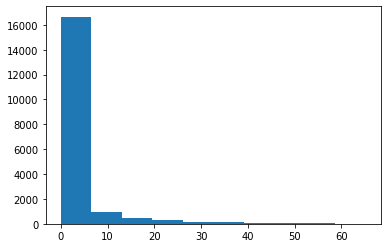

In [34]:
#quelle est l'intervalle de temps moyen entre deux sessions en jours
plt.hist(session_augmented.time_since_last_session_min/60/24)

print(session_augmented.time_since_last_session_min.mean()/60/24)


(0.0, 200.0)

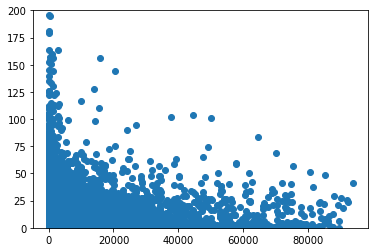

In [35]:
#lien entre la durée de la session, et la durée depuis la derniere session
plt.scatter(x = session_augmented.time_since_last_session_min, y = session_augmented.duration_min)

plt.ylim(0,200)



(0.0, 200.0)

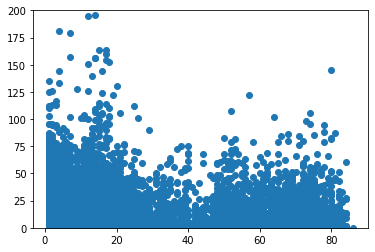

In [36]:
#lien entre la durée de la session, et la maturité
plt.scatter(x = session_augmented.week_maturity, y = session_augmented.duration_min)
plt.ylim(0,200)







(0.0, 200.0)

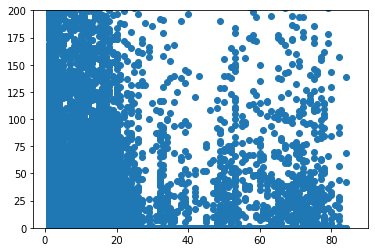

In [37]:
#lien entre la durée de la session, et la maturité
plt.scatter(x = session_augmented.week_maturity, y = session_augmented.time_since_last_session_min)

plt.ylim(0,200)





## create aggregated from session_augmented & add to user_final



In [38]:
#add timestamp of last session played by user
metrics_to_add = pd.DataFrame(session_augmented.groupby("user_id").max()["session_start"])
metrics_to_add = metrics_to_add.reset_index()
metrics_to_add.rename(columns = {'session_start':'last_session_start'}, inplace = True)
metrics_to_add


/tmp/ipykernel_4394/65263144.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  metrics_to_add = pd.DataFrame(session_augmented.groupby("user_id").max()["session_start"])


,user_id,last_session_start
0,211.0,2022-03-13 13:13:59.516000+00:00
1,274.0,2022-05-01 17:44:47.617000+00:00
2,453.0,2022-03-19 21:37:08.487000+00:00
3,564.0,2022-04-23 15:32:15.984000+00:00
4,609.0,2022-05-07 16:25:06.142000+00:00
...,...,...
2609,73184.0,2022-05-12 16:17:01.874000+00:00
2610,73185.0,2022-05-12 16:32:08.014000+00:00
2611,73188.0,2022-05-12 22:22:40.444000+00:00
2612,73197.0,2022-05-13 09:24:31.452000+00:00


In [39]:
#add last session metrics : duration, Time_spent, nb of game & setup events, time_since_last_session_min, % of good answers / total answers in last game, nb Scenes played, nb of scaffolding, churn risk  (group_by user_id and take last session )

grouping =session_augmented.loc[session_augmented.groupby("user_id")["session_start"].idxmax()]
grouping = grouping[["user_id", "game_events","setup_events", "unique_activity", "Time_Spent", "Action_Element_Name",
       "Profile_Age_days", "good_answer_ratio", "duration_min", "time_since_last_session_min", "event_type_Scene_Enter", "event_type_Scaffolding_Scaffolding","churn_risk"]]
metrics_to_add = grouping.merge(metrics_to_add.copy(),on="user_id",how='inner')

metrics_to_add.rename(columns = {"game_events":"last_game_game_events","setup_events" :"last_game_setup_events", "unique_activity":"last_game_unique_activity", "Time_Spent":"last_game_Time_Spent", "Action_Element_Name":"last_game_Action_Element_Name",
       "Profile_Age_days":"last_game_Profile_Age_days", "good_answer_ratio":"last_game_good_answer_ratio", "duration_min":"last_game_duration_min", "time_since_last_session_min":"last_game_time_since_last_session_min", "event_type_Scene_Enter":"last_game_event_type_Scene_Enter", "event_type_Scaffolding_Scaffolding":"last_game_event_type_Scaffolding_Scaffolding"}, inplace = True)
metrics_to_add


,user_id,last_game_game_events,last_game_setup_events,last_game_unique_activity,last_game_Time_Spent,last_game_Action_Element_Name,last_game_Profile_Age_days,last_game_good_answer_ratio,last_game_duration_min,last_game_time_since_last_session_min,last_game_event_type_Scene_Enter,last_game_event_type_Scaffolding_Scaffolding,churn_risk,last_session_start
0,211.0,126.0,0.0,9,3428.0,Back,2705.0,42.105263,18.256667,1294.32795,40.0,0.0,1,2022-03-13 13:13:59.516000+00:00
1,274.0,3.0,0.0,0,3.0,None,-1.0,NaN,0.049967,19028.19265,2.0,0.0,0,2022-05-01 17:44:47.617000+00:00
2,453.0,6.0,0.0,0,41.0,None,-1.0,NaN,0.472433,37.21480,3.0,0.0,1,2022-03-19 21:37:08.487000+00:00
3,564.0,52.0,0.0,0,693.0,Back,1962.0,NaN,5.641017,0.00000,30.0,0.0,0,2022-04-23 15:32:15.984000+00:00
4,609.0,0.0,0.0,1,1428.0,Back,2058.0,NaN,7.956633,0.00000,0.0,0.0,0,2022-05-07 16:25:06.142000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,73184.0,123.0,0.0,1,2494.0,Back,2199.0,50.000000,16.410250,0.00000,9.0,0.0,0,2022-05-12 16:17:01.874000+00:00
2610,73185.0,122.0,0.0,1,5743.0,Back,1378.0,50.000000,32.834550,0.00000,7.0,0.0,0,2022-05-12 16:32:08.014000+00:00
2611,73188.0,219.0,0.0,1,18505.0,Back,2010.0,100.000000,50.548167,0.00000,58.0,0.0,0,2022-05-12 22:22:40.444000+00:00
2612,73197.0,10.0,0.0,0,481.0,None,3652.0,NaN,0.805533,0.00000,1.0,0.0,0,2022-05-13 09:24:31.452000+00:00


In [40]:
# add metrics since signup : average time between 2 sessions, average session duration/ average time_spent,  % of good answers / total answers, average nb of games by session, average nb of scenes event_type_Scene_Enter, average scaffolding

list_to_average = ["time_since_last_session_min","duration_min","Time_Spent","good_answer_ratio","game_events","unique_activity","event_type_Scene_Enter","event_type_Scaffolding_Scaffolding"]

for col in list_to_average:
    col_series = session_augmented.groupby("user_id").mean()[col]  
    metrics_to_add = pd.merge(metrics_to_add.copy(), col_series, on="user_id", how="left")

metrics_to_add.rename(columns = {"time_since_last_session_min":"average_since_su_time_since_last_session","duration_min":"average_since_su_duration_min","Time_Spent":"average_since_su_Time_Spent","good_answer_ratio":"average_since_su_good_answer_ratio","game_events":"average_since_su_game_events","unique_activity":"average_since_su_unique_activity","event_type_Scene_Enter":"average_since_su_event_type_Scene_Enter","event_type_Scaffolding_Scaffolding":"average_since_su_event_type_Scaffolding_Scaffolding"}, inplace = True)
metrics_to_add



,user_id,last_game_game_events,last_game_setup_events,last_game_unique_activity,last_game_Time_Spent,last_game_Action_Element_Name,last_game_Profile_Age_days,last_game_good_answer_ratio,last_game_duration_min,last_game_time_since_last_session_min,...,churn_risk,last_session_start,average_since_su_time_since_last_session,average_since_su_duration_min,average_since_su_Time_Spent,average_since_su_good_answer_ratio,average_since_su_game_events,average_since_su_unique_activity,average_since_su_event_type_Scene_Enter,average_since_su_event_type_Scaffolding_Scaffolding
0,211.0,126.0,0.0,9,3428.0,Back,2705.0,42.105263,18.256667,1294.32795,...,1,2022-03-13 13:13:59.516000+00:00,2204.765063,24.549023,9047.875000,85.660885,103.000000,8.250000,40.000000,0.0
1,274.0,3.0,0.0,0,3.0,None,-1.0,NaN,0.049967,19028.19265,...,0,2022-05-01 17:44:47.617000+00:00,9513.140860,0.415362,41.285714,NaN,5.714286,0.000000,4.428571,0.0
2,453.0,6.0,0.0,0,41.0,None,-1.0,NaN,0.472433,37.21480,...,1,2022-03-19 21:37:08.487000+00:00,24892.368950,11.830778,2129.333333,25.000000,51.000000,2.666667,7.666667,0.0
3,564.0,52.0,0.0,0,693.0,Back,1962.0,NaN,5.641017,0.00000,...,0,2022-04-23 15:32:15.984000+00:00,0.000000,5.641017,693.000000,NaN,52.000000,0.000000,30.000000,0.0
4,609.0,0.0,0.0,1,1428.0,Back,2058.0,NaN,7.956633,0.00000,...,0,2022-05-07 16:25:06.142000+00:00,0.000000,7.956633,1428.000000,NaN,0.000000,1.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,73184.0,123.0,0.0,1,2494.0,Back,2199.0,50.000000,16.410250,0.00000,...,0,2022-05-12 16:17:01.874000+00:00,0.000000,16.410250,2494.000000,50.000000,123.000000,1.000000,9.000000,0.0
2610,73185.0,122.0,0.0,1,5743.0,Back,1378.0,50.000000,32.834550,0.00000,...,0,2022-05-12 16:32:08.014000+00:00,0.000000,32.834550,5743.000000,50.000000,122.000000,1.000000,7.000000,0.0
2611,73188.0,219.0,0.0,1,18505.0,Back,2010.0,100.000000,50.548167,0.00000,...,0,2022-05-12 22:22:40.444000+00:00,0.000000,50.548167,18505.000000,100.000000,219.000000,1.000000,58.000000,0.0
2612,73197.0,10.0,0.0,0,481.0,None,3652.0,NaN,0.805533,0.00000,...,0,2022-05-13 09:24:31.452000+00:00,0.000000,0.805533,481.000000,NaN,10.000000,0.000000,1.000000,0.0


In [41]:
# add count of sessions
list_to_unique_count = ["session_id"]
for col in list_to_unique_count:
    col_series = session_augmented.groupby("user_id").nunique()[col]  
    metrics_to_add = pd.merge(metrics_to_add.copy(), col_series, on="user_id", how="left")

metrics_to_add.rename(columns = {"session_id":"count_since_su_unique_session"}, inplace = True)
metrics_to_add



,user_id,last_game_game_events,last_game_setup_events,last_game_unique_activity,last_game_Time_Spent,last_game_Action_Element_Name,last_game_Profile_Age_days,last_game_good_answer_ratio,last_game_duration_min,last_game_time_since_last_session_min,...,last_session_start,average_since_su_time_since_last_session,average_since_su_duration_min,average_since_su_Time_Spent,average_since_su_good_answer_ratio,average_since_su_game_events,average_since_su_unique_activity,average_since_su_event_type_Scene_Enter,average_since_su_event_type_Scaffolding_Scaffolding,count_since_su_unique_session
0,211.0,126.0,0.0,9,3428.0,Back,2705.0,42.105263,18.256667,1294.32795,...,2022-03-13 13:13:59.516000+00:00,2204.765063,24.549023,9047.875000,85.660885,103.000000,8.250000,40.000000,0.0,8
1,274.0,3.0,0.0,0,3.0,None,-1.0,NaN,0.049967,19028.19265,...,2022-05-01 17:44:47.617000+00:00,9513.140860,0.415362,41.285714,NaN,5.714286,0.000000,4.428571,0.0,7
2,453.0,6.0,0.0,0,41.0,None,-1.0,NaN,0.472433,37.21480,...,2022-03-19 21:37:08.487000+00:00,24892.368950,11.830778,2129.333333,25.000000,51.000000,2.666667,7.666667,0.0,3
3,564.0,52.0,0.0,0,693.0,Back,1962.0,NaN,5.641017,0.00000,...,2022-04-23 15:32:15.984000+00:00,0.000000,5.641017,693.000000,NaN,52.000000,0.000000,30.000000,0.0,1
4,609.0,0.0,0.0,1,1428.0,Back,2058.0,NaN,7.956633,0.00000,...,2022-05-07 16:25:06.142000+00:00,0.000000,7.956633,1428.000000,NaN,0.000000,1.000000,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,73184.0,123.0,0.0,1,2494.0,Back,2199.0,50.000000,16.410250,0.00000,...,2022-05-12 16:17:01.874000+00:00,0.000000,16.410250,2494.000000,50.000000,123.000000,1.000000,9.000000,0.0,1
2610,73185.0,122.0,0.0,1,5743.0,Back,1378.0,50.000000,32.834550,0.00000,...,2022-05-12 16:32:08.014000+00:00,0.000000,32.834550,5743.000000,50.000000,122.000000,1.000000,7.000000,0.0,1
2611,73188.0,219.0,0.0,1,18505.0,Back,2010.0,100.000000,50.548167,0.00000,...,2022-05-12 22:22:40.444000+00:00,0.000000,50.548167,18505.000000,100.000000,219.000000,1.000000,58.000000,0.0,1
2612,73197.0,10.0,0.0,0,481.0,None,3652.0,NaN,0.805533,0.00000,...,2022-05-13 09:24:31.452000+00:00,0.000000,0.805533,481.000000,NaN,10.000000,0.000000,1.000000,0.0,1


In [42]:
# add sum of (non-deduplicated) game events, games, scenes, total session duration/  time_spent
list_to_sum = ["game_events", "unique_activity", "event_type_Scene_Enter","duration_min", "Time_Spent"]

for col in list_to_sum:
    col_series = session_augmented.groupby("user_id").sum()[col]  
    metrics_to_add = pd.merge(metrics_to_add.copy(), col_series, on="user_id", how="left")

metrics_to_add.rename(columns = {"game_events":"sum_since_su_game_events", "unique_activity":"sum_since_su_", "event_type_Scene_Enter":"sum_since_su_event_type_Scene_Enter","duration_min":"sum_since_su_duration_min", "Time_Spent":"sum_since_su_Time_Spent"}, inplace = True)
metrics_to_add



,user_id,last_game_game_events,last_game_setup_events,last_game_unique_activity,last_game_Time_Spent,last_game_Action_Element_Name,last_game_Profile_Age_days,last_game_good_answer_ratio,last_game_duration_min,last_game_time_since_last_session_min,...,average_since_su_game_events,average_since_su_unique_activity,average_since_su_event_type_Scene_Enter,average_since_su_event_type_Scaffolding_Scaffolding,count_since_su_unique_session,sum_since_su_game_events,sum_since_su_,sum_since_su_event_type_Scene_Enter,sum_since_su_duration_min,sum_since_su_Time_Spent
0,211.0,126.0,0.0,9,3428.0,Back,2705.0,42.105263,18.256667,1294.32795,...,103.000000,8.250000,40.000000,0.0,8,824.0,66,320.0,196.392183,72383.0
1,274.0,3.0,0.0,0,3.0,None,-1.0,NaN,0.049967,19028.19265,...,5.714286,0.000000,4.428571,0.0,7,40.0,0,31.0,2.907533,289.0
2,453.0,6.0,0.0,0,41.0,None,-1.0,NaN,0.472433,37.21480,...,51.000000,2.666667,7.666667,0.0,3,153.0,8,23.0,35.492333,6388.0
3,564.0,52.0,0.0,0,693.0,Back,1962.0,NaN,5.641017,0.00000,...,52.000000,0.000000,30.000000,0.0,1,52.0,0,30.0,5.641017,693.0
4,609.0,0.0,0.0,1,1428.0,Back,2058.0,NaN,7.956633,0.00000,...,0.000000,1.000000,0.000000,0.0,1,0.0,1,0.0,7.956633,1428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,73184.0,123.0,0.0,1,2494.0,Back,2199.0,50.000000,16.410250,0.00000,...,123.000000,1.000000,9.000000,0.0,1,123.0,1,9.0,16.410250,2494.0
2610,73185.0,122.0,0.0,1,5743.0,Back,1378.0,50.000000,32.834550,0.00000,...,122.000000,1.000000,7.000000,0.0,1,122.0,1,7.0,32.834550,5743.0
2611,73188.0,219.0,0.0,1,18505.0,Back,2010.0,100.000000,50.548167,0.00000,...,219.000000,1.000000,58.000000,0.0,1,219.0,1,58.0,50.548167,18505.0
2612,73197.0,10.0,0.0,0,481.0,None,3652.0,NaN,0.805533,0.00000,...,10.000000,0.000000,1.000000,0.0,1,10.0,0,1.0,0.805533,481.0


In [43]:
# by Scene_Name, nb of events Scene_Start since signup : not done

In [44]:
#merge to user_final DF

user_final = user_final.copy().merge(metrics_to_add,on="user_id",how='left')
user_final


,user_id,client_event_time,city,language,os_version,region,country,device_model,start_version,user_creation_time,...,average_since_su_game_events,average_since_su_unique_activity,average_since_su_event_type_Scene_Enter,average_since_su_event_type_Scaffolding_Scaffolding,count_since_su_unique_session,sum_since_su_game_events,sum_since_su_,sum_since_su_event_type_Scene_Enter,sum_since_su_duration_min,sum_since_su_Time_Spent
0,72041.0,2022-04-01 20:45:46.891000+00:00,no_city,English,12.5.5,no_region,Iran,iPad Air,1.3.0,2022-04-01 20:03:09.286000+00:00,...,221.000000,0.000000,221.000000,0.0,1.0,221.0,0.0,221.0,22.834500,274557.0
1,73163.0,2022-05-11 23:24:04.316000+00:00,no_city,English,15.2.1,no_region,Iran,iPad 5,2.0.6,2022-05-11 23:07:26.914000+00:00,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,8.827267,2082.0
2,72030.0,2022-04-01 22:16:47.193000+00:00,Muscat,English,15.4.1,Muscat,Oman,iPad 6,1.3.0,2022-04-01 11:54:18.680000+00:00,...,14.333333,0.000000,7.666667,0.0,3.0,43.0,0.0,23.0,5.723883,1853.0
3,65828.0,2022-04-06 23:52:57.543000+00:00,Lima,English,15.3.1,Lima,Peru,iPad Pro,1.0.1,2021-11-25 21:14:53.544000+00:00,...,8.333333,0.000000,4.666667,0.0,3.0,25.0,0.0,14.0,3.080383,308.0
4,71928.0,2022-04-09 01:00:45.402000+00:00,Lima,English,14.8.1,Lima,Peru,iPad Mini 5,1.3.0,2022-03-29 16:44:39.174000+00:00,...,11.000000,0.000000,5.400000,0.0,5.0,55.0,0.0,27.0,3.982200,2198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,50624.0,2022-04-09 10:14:52.893000+00:00,Dubai,English,14.8.1,Dubai,United Arab Emirates,"iPad11,6",9.1.0,2020-12-29 06:54:15.901000+00:00,...,68.666667,3.666667,11.666667,0.0,3.0,206.0,11.0,35.0,42.179950,9264.0
2622,54360.0,2022-03-20 14:16:22.446000+00:00,Dubai,English,15.3.1,Dubai,United Arab Emirates,iPad Air 2,1.2.0,2021-02-23 12:34:34.944000+00:00,...,140.000000,4.000000,91.000000,0.0,1.0,140.0,4.0,91.0,39.785633,7331.0
2623,72655.0,2022-04-22 16:11:00.120000+00:00,Ras al-Khaimah,English,14.8.1,Imarat Ra's al Khaymah,United Arab Emirates,iPad Air 3,4.0.1,2020-10-07 07:40:55.047000+00:00,...,61.500000,0.500000,21.000000,0.0,2.0,123.0,1.0,42.0,24.527300,5112.0
2624,18557.0,2022-04-05 04:57:37.838000+00:00,Dubai,Spanish,12.5.5,Dubai,United Arab Emirates,iPad Air,1.3.0,2022-04-03 06:36:36.939000+00:00,...,8.000000,0.000000,7.000000,0.0,1.0,8.0,0.0,7.0,0.994517,695.0


## add last columns : calculating time differences




In [45]:
TODAY = datetime(2022, 5, 13, 0, 0) #on se place au moment de l'extract des data pour evaluer les utilisateurs

In [46]:
#drop lines where last_session_start is na
user_final.last_session_start.isna().value_counts() 
user_augmented = user_final.drop(user_final[user_final.last_session_start.isna()].index)

In [47]:
#add to user_augmented : week_maturity (today minus user_creation_time) en semaine
user_augmented["user_creation_time"]=user_augmented["user_creation_time"].map(lambda x: x.to_pydatetime())
user_augmented["user_creation_time"]=user_augmented["user_creation_time"].map(lambda x: x.replace(tzinfo=None))
user_augmented["week_maturity"] = (TODAY - user_augmented['user_creation_time']).map(lambda x: int(np.ceil(x.days/7))+1)

In [48]:
# add to user_augmented : time since last session (today minus session_start) en jours? ou semaine
user_augmented["last_session_start"]=user_augmented["last_session_start"].map(lambda x: x.to_pydatetime())
user_augmented["last_session_start"]=user_augmented["last_session_start"].map(lambda x: x.replace(tzinfo=None))
user_augmented["time_since_last_session"] = (TODAY - user_augmented['last_session_start']).map(lambda x: int(np.ceil(x.days/7))+1)


In [49]:
print(list(user_augmented.columns))

['user_id', 'client_event_time', 'city', 'language', 'os_version', 'region', 'country', 'device_model', 'start_version', 'user_creation_time', 'id', 'session_id', 'event_type_Account_Sign_In', 'event_type_Account_Sign_Out', 'event_type_Account_Sign_Up', 'event_type_Account_Update_Request', 'event_type_Account_Update_Success', 'event_type_Action_Click', 'event_type_Action_ConversionClickRedeem', 'event_type_Action_ConversionClickSubscribe', 'event_type_Activation_Game', 'event_type_Activation_New_Activation', 'event_type_Activation_Piece', 'event_type_Activation_Product', 'event_type_Activity_Good_Answer', 'event_type_Activity_Start', 'event_type_Activity_Stop', 'event_type_Activity_Wrong_Answer', 'event_type_Error_Error', 'event_type_Game_Pause', 'event_type_Game_Start', 'event_type_Game_Stop', 'event_type_OB_ClickStore', 'event_type_OB_ClickTrial', 'event_type_OB_CommPreview', 'event_type_OB_DiscoverTrial', 'event_type_OB_DoYouHaveKit', 'event_type_OB_Email', 'event_type_OB_HasKeyNo',

# Preparing user_augmented for ML classification model


## Manage missing values


In [50]:
user_ML = user_augmented.copy()


In [51]:
user_ML.duplicated().sum() # Compute the number of duplicated rows


0

In [52]:
user_ML.isnull().sum().sort_values(ascending = False)/len(user_ML)*100


Pieces_English                        96.633512
last_game_good_answer_ratio           61.935731
last_game_Action_Element_Name         37.528692
average_since_su_good_answer_ratio    28.844682
Products_Sensory_kit                  17.788829
                                        ...    
event_type_OB_KeyFail                  0.000000
event_type_OB_HasKitYes                0.000000
event_type_OB_HasKitNo                 0.000000
event_type_OB_HasKeyNo                 0.000000
time_since_last_session                0.000000
Length: 142, dtype: float64

In [53]:
#drop columns with 30%+ missing values
user_ML = user_ML.drop(columns = ["Pieces_English","Products_Sensory_kit","last_game_Action_Element_Name"])



In [54]:
#replace columns with nan with 0 where meaningful
user_ML.last_game_good_answer_ratio.fillna(0,inplace=True) #remplace les NaN par 0
user_ML.average_since_su_good_answer_ratio.fillna(0,inplace=True) #remplace les NaN par 0
user_ML.Purchases_PLM.fillna(0,inplace=True) #remplace les NaN par 0
user_ML.Purchases_EY3M.fillna(0,inplace=True) #remplace les NaN par 0
user_ML.Purchases_PY3M.fillna(0,inplace=True) #remplace les NaN par 0
user_ML.Purchases_EY1Y.fillna(0,inplace=True) #remplace les NaN par 0
user_ML.purchases_y.fillna(0,inplace=True) #remplace les NaN par 0
user_ML.Purchases_PY1Y.fillna(0,inplace=True) #remplace les NaN par 0
user_ML.Purchases_PLY.fillna(0,inplace=True) #remplace les NaN par 0
user_ML.Purchases_MEGR.fillna(0,inplace=True) #remplace les NaN par 0
user_ML.Purchases_ME1.fillna(0,inplace=True) #remplace les NaN par 0
user_ML.Purchases_tier_upgrade_0_to_1.fillna(0,inplace=True) #remplace les NaN par 0
user_ML.Purchases_PM3M.fillna(0,inplace=True) #remplace les NaN par 0
user_ML.Purchases_MPGR.fillna(0,inplace=True) #remplace les NaN par 0


In [55]:
#replace columns with median where meaningful (age outlier + a lot of -1 values)
selection_mean = ["last_game_Profile_Age_days","last_game_Time_Spent"]
for column in selection_mean:
    imputer = SimpleImputer(strategy="median")  # Instantiate a SimpleImputer object with your strategy of choice 
    imputer.fit(user_ML[[column]])  # Call the "fit" method on the object
    user_ML[[column]]= imputer.transform(user_ML[[column]]) 
    

In [56]:
#replace columns with most frequent value where meaningful - not debugged
imputer = SimpleImputer(strategy="most_frequent", missing_values = None)  # Instantiate a SimpleImputer object with your strategy of choice 

imputer.fit(user_ML[["Type"]])  # Call the "fit" method on the object
user_ML[["Type"]]= imputer.transform(user_ML[["Type"]])


In [57]:
# user_ML.Type.isna().value_counts() #1 line with Type missing. we drop it
# # 2217+396
# user_ML = user_ML.drop(user_ML[user_ML.Type.isna()].index)

In [58]:
#drop lines where label (churn_risk) in na, a priori already managed earlier

user_ML = user_ML.drop(user_ML[user_ML.churn_risk.isna()].index)

# user_ML.churn_risk.isna().value_counts() 
# plt.hist(user_ML.average_since_su_good_answer_ratio)

# 1580+1034+12

In [59]:
user_ML.shape



(2614, 139)

In [60]:
user_ML.isna().sum().sort_values(ascending = False)/len(user_ML)*100



user_id                    0.0
Games_Marbotic_Letters     0.0
Games_10_Fingers           0.0
Games_Lil_Reader           0.0
Games_Bla_Bla_Box          0.0
                          ... 
event_type_OB_HasKitYes    0.0
event_type_OB_HasKitNo     0.0
event_type_OB_HasKeyNo     0.0
event_type_OB_Email        0.0
time_since_last_session    0.0
Length: 139, dtype: float64

(array([1034.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1580.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

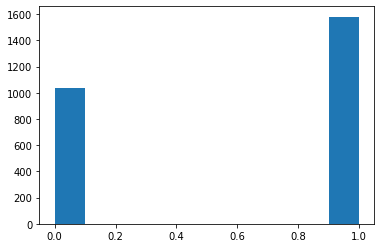

In [61]:
plt.hist(user_ML.churn_risk) #classes are balanced


In [136]:
user_ML.head(20)

,user_id,city,language,os_version,region,country,device_model,start_version,id,session_id,...,average_since_su_event_type_Scene_Enter,average_since_su_event_type_Scaffolding_Scaffolding,count_since_su_unique_session,sum_since_su_game_events,sum_since_su_,sum_since_su_event_type_Scene_Enter,sum_since_su_duration_min,sum_since_su_Time_Spent,week_maturity,time_since_last_session
0,72041.0,no_city,English,12.5.5,no_region,Iran,iPad Air,1.3.0,221,1,...,221.000000,0.00,1.0,221.0,0.0,221.0,22.834500,274557.0,7,7
1,73163.0,no_city,English,15.2.1,no_region,Iran,iPad 5,2.0.6,87,1,...,0.000000,0.00,1.0,0.0,0.0,0.0,8.827267,2082.0,2,2
2,72030.0,Muscat,English,15.4.1,Muscat,Oman,iPad 6,1.3.0,43,3,...,7.666667,0.00,3.0,43.0,0.0,23.0,5.723883,1853.0,7,7
3,65828.0,Lima,English,15.3.1,Lima,Peru,iPad Pro,1.0.1,25,3,...,4.666667,0.00,3.0,25.0,0.0,14.0,3.080383,308.0,25,7
4,71928.0,Lima,English,14.8.1,Lima,Peru,iPad Mini 5,1.3.0,55,5,...,5.400000,0.00,5.0,55.0,0.0,27.0,3.982200,2198.0,8,6
5,44652.0,Chiclayo,Spanish,14.0.1,Lambayeque,Peru,iPad Pro,4.0.3,168,2,...,10.500000,6.00,2.0,168.0,4.0,21.0,32.473100,24045.0,77,9
6,24066.0,Santiago,Spanish,14.6,Santiago Metropolitan,Chile,iPad 6,4.0.3,10,1,...,8.000000,0.00,1.0,10.0,0.0,8.0,6.122917,564.0,77,7
7,26436.0,Santiago,Spanish,15.1,Santiago Metropolitan,Chile,"iPad12,1",1.0.9,193,2,...,10.500000,0.00,2.0,189.0,9.0,21.0,36.912883,9936.0,9,9
8,59648.0,Villa Alemana,Spanish,14.4.2,Region de Valparaiso,Chile,iPad 6,4.2.2,52,1,...,2.000000,0.00,1.0,52.0,1.0,2.0,7.896100,739.0,46,1
9,16640.0,Santiago,Spanish,12.5.5,Santiago Metropolitan,Chile,iPad Mini 2,1.0.9,231,2,...,22.500000,0.00,2.0,231.0,27.0,45.0,52.141317,7279.0,11,11


## Prepare upload to Big query : convert bool to integer & remove timestamps




In [62]:
#convert bool to integer
user_ML.purchases_x = user_ML.purchases_x.replace({True: 1, False: 0})

In [63]:
#remove timestamp columns
user_ML = user_ML.drop(columns = ['client_event_time', 'user_creation_time', 'last_session_start'])


In [64]:
user_ML.columns

Index(['user_id', 'city', 'language', 'os_version', 'region', 'country',
       'device_model', 'start_version', 'id', 'session_id',
       ...
       'average_since_su_event_type_Scene_Enter',
       'average_since_su_event_type_Scaffolding_Scaffolding',
       'count_since_su_unique_session', 'sum_since_su_game_events',
       'sum_since_su_', 'sum_since_su_event_type_Scene_Enter',
       'sum_since_su_duration_min', 'sum_since_su_Time_Spent', 'week_maturity',
       'time_since_last_session'],
      dtype='object', length=136)

In [65]:
result = user_ML.select_dtypes(include = "bool").columns
print("Output:")
print(result)


Output:
Index([], dtype='object')


In [67]:
user_ML.purchases_y = user_ML.purchases_y.replace({True: 1, False: 0})


In [68]:
user_ML.purchases_y.fillna(0,inplace=True) #remplace les NaN par 0

## Uploading table user_augmented on Big query


In [71]:
#Localisation du projet name et table_id sur gcp
project="marbotic"
table_id = "marbotic_dataset.user_augmented"
client = bigquery.Client(project,credentials)

job = client.load_table_from_dataframe(user_ML, table_id)

job.result()  # Wait for the job to complete.
table = client.get_table(table_id)  # Make an API request.
print("Loaded {} rows and {} columns to {}".format(table.num_rows, len(table.schema), table_id))



Loaded 5228 rows and 136 columns to marbotic_dataset.user_augmented


## Prepare X & y to preprocessing 



In [145]:
X = user_ML.drop(columns = ["churn_risk","time_since_last_session"])
y = user_ML.churn_risk


In [146]:
X.shape


(2614, 134)

### Verify correlation between columns & remove correlated features


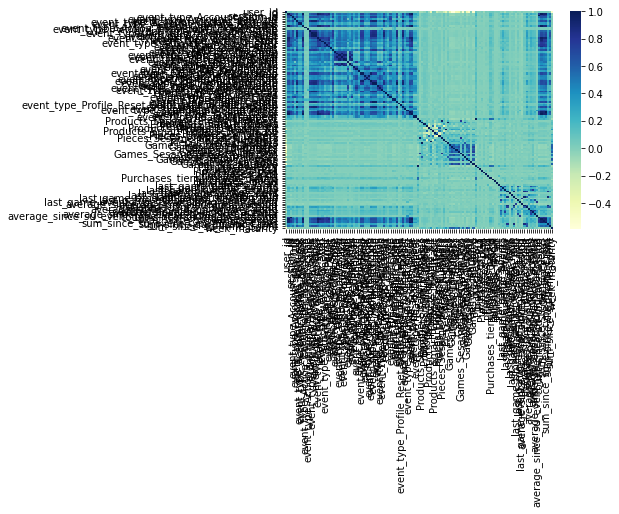

In [147]:
# Heatmap
corr = X.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu");


In [148]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df.head(20)


,feature_1,feature_2,correlation
7901,purchases_x,purchases_y,1.000000
8140,Products_Smart_Shapes,Pieces_Shapes,1.000000
9640,Pieces_Shapes,Products_Smart_Shapes,1.000000
11276,purchases_y,purchases_x,1.000000
7430,event_type_Scene_Enter,sum_since_su_event_type_Scene_Enter,0.999944
15430,sum_since_su_event_type_Scene_Enter,event_type_Scene_Enter,0.999944
14996,count_since_su_unique_session,session_id,0.999791
371,session_id,count_since_su_unique_session,0.999791
7746,event_type_Toast_Disappear,event_type_Toast_Appear,0.996808
7621,event_type_Toast_Appear,event_type_Toast_Disappear,0.996808


In [149]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]



/tmp/ipykernel_4394/2710754905.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


In [150]:
to_drop



['event_type_Account_Update_Success',
 'event_type_Action_Click',
 'event_type_Activation_New_Activation',
 'event_type_Activation_Piece',
 'event_type_Activation_Product',
 'event_type_Activity_Good_Answer',
 'event_type_Activity_Start',
 'event_type_OB_DiscoverTrial',
 'event_type_OB_DoYouHaveKit',
 'event_type_OB_Email',
 'event_type_OB_HasKitNo',
 'event_type_OB_HasKitYes',
 'event_type_OB_ProductHelp',
 'event_type_OB_ProductSeeMore',
 'event_type_OB_ProductSelection',
 'event_type_OB_ProfileBirthdate',
 'event_type_OB_ProfileName',
 'event_type_OB_Success',
 'event_type_Popup_Open',
 'event_type_Profile_Create',
 'event_type_Profile_Update',
 'event_type_Scene_Enter',
 'event_type_Scene_Leave',
 'event_type_Toast_Disappear',
 'Pieces_Sesame_Street_Numbers',
 'Pieces_Nordic_Letters',
 'Pieces_Shapes',
 'purchases_y',
 'average_since_su_duration_min',
 'count_since_su_unique_session',
 'sum_since_su_game_events',
 'sum_since_su_',
 'sum_since_su_event_type_Scene_Enter',
 'sum_since

In [151]:
X_uncorr = X.drop(columns = to_drop)
X_uncorr



,user_id,city,language,os_version,region,country,device_model,start_version,id,session_id,...,last_game_event_type_Scaffolding_Scaffolding,average_since_su_time_since_last_session,average_since_su_Time_Spent,average_since_su_good_answer_ratio,average_since_su_game_events,average_since_su_unique_activity,average_since_su_event_type_Scene_Enter,average_since_su_event_type_Scaffolding_Scaffolding,sum_since_su_Time_Spent,week_maturity
0,72041.0,no_city,English,12.5.5,no_region,Iran,iPad Air,1.3.0,221,1,...,0.0,0.000000,274557.000000,0.000000,221.000000,0.000000,221.000000,0.0,274557.0,7
1,73163.0,no_city,English,15.2.1,no_region,Iran,iPad 5,2.0.6,87,1,...,0.0,0.000000,2082.000000,0.000000,0.000000,0.000000,0.000000,0.0,2082.0,2
2,72030.0,Muscat,English,15.4.1,Muscat,Oman,iPad 6,1.3.0,43,3,...,0.0,205.674561,617.666667,100.000000,14.333333,0.000000,7.666667,0.0,1853.0,7
3,65828.0,Lima,English,15.3.1,Lima,Peru,iPad Pro,1.0.1,25,3,...,0.0,7339.910350,102.666667,0.000000,8.333333,0.000000,4.666667,0.0,308.0,25
4,71928.0,Lima,English,14.8.1,Lima,Peru,iPad Mini 5,1.3.0,55,5,...,0.0,2978.936270,439.600000,0.000000,11.000000,0.000000,5.400000,0.0,2198.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,50624.0,Dubai,English,14.8.1,Dubai,United Arab Emirates,"iPad11,6",9.1.0,223,3,...,0.0,9646.321578,3088.000000,50.000000,68.666667,3.666667,11.666667,0.0,9264.0,73
2622,54360.0,Dubai,English,15.3.1,Dubai,United Arab Emirates,iPad Air 2,1.2.0,140,1,...,0.0,0.000000,7331.000000,100.000000,140.000000,4.000000,91.000000,0.0,7331.0,65
2623,72655.0,Ras al-Khaimah,English,14.8.1,Imarat Ra's al Khaymah,United Arab Emirates,iPad Air 3,4.0.1,123,2,...,0.0,78.596108,2556.000000,50.000000,61.500000,0.500000,21.000000,0.0,5112.0,85
2624,18557.0,Dubai,Spanish,12.5.5,Dubai,United Arab Emirates,iPad Air,1.3.0,8,1,...,0.0,0.000000,695.000000,0.000000,8.000000,0.000000,7.000000,0.0,695.0,7


### Group columns by type (select_dtypes) to apply adequate preprocessing



In [152]:
class CustomMinMaxScale(MinMaxScaler):
    def fit(self, *args, **kwargs):
        return super().fit(*args, **kwargs) 
    
    def transform(self,*args, **kwargs):
        return pd.DataFrame(super().transform(*args, **kwargs), columns=self.get_feature_names_out())

    def fit_transform(self,*args, **kwargs):
        return pd.DataFrame(super().fit_transform(*args, **kwargs), columns=self.get_feature_names_out())
    


In [153]:
num_transformer = CustomMinMaxScale()
num_columns = X_uncorr.select_dtypes(include=['float64','int64','timedelta']).columns
num_columns


Index(['user_id', 'id', 'session_id', 'event_type_Account_Sign_In',
       'event_type_Account_Sign_Out', 'event_type_Account_Sign_Up',
       'event_type_Account_Update_Request',
       'event_type_Action_ConversionClickRedeem',
       'event_type_Action_ConversionClickSubscribe',
       'event_type_Activation_Game', 'event_type_Activity_Stop',
       'event_type_Activity_Wrong_Answer', 'event_type_Error_Error',
       'event_type_Game_Pause', 'event_type_Game_Start',
       'event_type_Game_Stop', 'event_type_OB_ClickStore',
       'event_type_OB_ClickTrial', 'event_type_OB_CommPreview',
       'event_type_OB_HasKeyNo', 'event_type_OB_KeyFail',
       'event_type_OB_KeyRedeem', 'event_type_OB_KeySuccess',
       'event_type_OB_ProductActivation', 'event_type_OB_ProductOther',
       'event_type_OB_ProductSK', 'event_type_OB_RenewalFail',
       'event_type_OB_RenewalSelection', 'event_type_OB_RenewalSuccess',
       'event_type_OB_TrialStart', 'event_type_OB_Type',
       'event_type

In [154]:
class CustomOHE(OneHotEncoder):
    def fit(self, *args, **kwargs):
        return super().fit(*args, **kwargs) 
    
    def transform(self,*args, **kwargs):
        return pd.DataFrame(super().transform(*args, **kwargs), columns=self.get_feature_names_out())

    def fit_transform(self,*args, **kwargs):
        return pd.DataFrame(super().fit_transform(*args, **kwargs), columns=self.get_feature_names_out())
    
    

In [155]:
cat_transformer = CustomOHE(sparse = False, handle_unknown = "ignore", drop='if_binary')
#sparse = False pour eviter que OHE qui renvoie trop de zero change le format de sortie apres le preprocessing

cat_columns = X_uncorr.select_dtypes(include=['object','O']).columns

cat_columns



Index(['city', 'language', 'os_version', 'region', 'country', 'device_model',
       'start_version', 'Type'],
      dtype='object')

In [156]:
bool_columns = X_uncorr.select_dtypes(include="bool").columns

bool_columns

Index([], dtype='object')

In [157]:
time_columns = X_uncorr.select_dtypes(include = ["datetime","datetime64[ns, UTC]"]).columns


time_columns


Index([], dtype='object')

In [158]:
len(cat_columns)+len(num_columns)+len(time_columns)+len(bool_columns)


100

### Define preprocessor


In [159]:
class CustomColumnTransformer(ColumnTransformer):
    
    def fit(self, *args, **kwargs):
        return super().fit(*args, **kwargs)
    
    def transform(self, X, *args, **kwargs):
        return pd.DataFrame(super().transform(X, *args, **kwargs), columns=self.get_feature_names_out())
    
    def fit_transform(self, X, *args, **kwargs):
        return pd.DataFrame(super().fit_transform(X, *args, **kwargs), columns=self.get_feature_names_out())


In [160]:
#pre-processor for all columns
preprocessor = CustomColumnTransformer([('num_tr',num_transformer,num_columns),('cat_tr',cat_transformer,cat_columns)],remainder = 'drop')



## Prepare preprocessed train & test data



In [161]:
X_train, X_test, y_train, y_test = train_test_split(X_uncorr, y, test_size=0.30)


In [162]:
X_train.shape


(1829, 100)

In [163]:
X_preproc = pd.DataFrame(preprocessor.fit_transform(X_train))



In [164]:
preprocessor


CustomColumnTransformer(transformers=[('num_tr', CustomMinMaxScale(),
                                       Index(['user_id', 'id', 'session_id', 'event_type_Account_Sign_In',
       'event_type_Account_Sign_Out', 'event_type_Account_Sign_Up',
       'event_type_Account_Update_Request',
       'event_type_Action_ConversionClickRedeem',
       'event_type_Action_ConversionClickSubscribe',
       'event_type_Activation_Game', 'event_...
       'average_since_su_game_events', 'average_since_su_unique_activity',
       'average_since_su_event_type_Scene_Enter',
       'average_since_su_event_type_Scaffolding_Scaffolding',
       'sum_since_su_Time_Spent', 'week_maturity'],
      dtype='object')),
                                      ('cat_tr',
                                       CustomOHE(drop='if_binary',
                                                 handle_unknown='ignore',
                                                 sparse=False),
                                       Index(['city', 'language', 'os_version', 'region', 'country', 'device_model',
       'start_version', 'Type'],
      dtype='object'))])

In [165]:
X_preproc

,num_tr__user_id,num_tr__id,num_tr__session_id,num_tr__event_type_Account_Sign_In,num_tr__event_type_Account_Sign_Out,num_tr__event_type_Account_Sign_Up,num_tr__event_type_Account_Update_Request,num_tr__event_type_Action_ConversionClickRedeem,num_tr__event_type_Action_ConversionClickSubscribe,num_tr__event_type_Activation_Game,...,cat_tr__start_version_5.1.0,cat_tr__start_version_5.2.0,cat_tr__start_version_5.2.1,cat_tr__start_version_5.2.3,cat_tr__start_version_8.0.0,cat_tr__start_version_8.1.0,cat_tr__start_version_9.1.0,cat_tr__start_version_9.1.1,cat_tr__start_version_9.1.3,cat_tr__Type_Teacher
0,0.930946,0.000539,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.989162,0.009200,0.017778,0.0,0.0,0.034483,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.682528,0.003326,0.008889,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.919738,0.081897,0.075556,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.950100,0.002487,0.013333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,0.902968,0.011058,0.008889,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1825,0.933549,0.019538,0.044444,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1826,0.904900,0.000839,0.004444,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1827,0.076398,0.018249,0.031111,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature selection


### permutation   #doesn't give interesting results




In [166]:
#Permet d'obtenir l'importance des features au regard des autres
#pour chaque modèle on l'entraine 10 fois en mélangeant les valeurs d'une colonne gardant toutes les autres identiques
 
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter = 500).fit(X_preproc, y_train) # Fit model




In [168]:
# on peut mettre un keyworld arg max_iter=1000, par défaut le modèle a une limite (100, à vérifier)
# permutation_score = permutation_importance(log_model, X_preproc, y_train, n_repeats=10) # Perform Permutation

# importance_df = pd.DataFrame(np.vstack((X_preproc.columns,
#                                         permutation_score.importances_mean)).T) # Unstack results
# importance_df.columns=['feature','score decrease']

# importance_df.sort_values(by="score decrease", ascending = False) # Order by importance


### Select percentile


In [169]:
class CustomSelectPercentile(SelectPercentile):
    def fit(self, *args, **kwargs):
        return super().fit(*args, **kwargs) 
    
    def transform(self,*args, **kwargs):
        return pd.DataFrame(super().transform(*args, **kwargs), columns=self.get_feature_names_out())

    def fit_transform(self,*args, **kwargs):
        return pd.DataFrame(super().fit_transform(*args, **kwargs), columns=self.get_feature_names_out())
    

## Define model & optimize (grid search)


### Define full pipeline (with 75% select percentile)




In [170]:
pipe = make_pipeline(preprocessor,CustomSelectPercentile(percentile=75), RidgeClassifier())


In [171]:
pipe


Pipeline(steps=[('customcolumntransformer',
                 CustomColumnTransformer(transformers=[('num_tr',
                                                        CustomMinMaxScale(),
                                                        Index(['user_id', 'id', 'session_id', 'event_type_Account_Sign_In',
       'event_type_Account_Sign_Out', 'event_type_Account_Sign_Up',
       'event_type_Account_Update_Request',
       'event_type_Action_ConversionClickRedeem',
       'event_type_Action_ConversionClickSubs...
       'sum_since_su_Time_Spent', 'week_maturity'],
      dtype='object')),
                                                       ('cat_tr',
                                                        CustomOHE(drop='if_binary',
                                                                  handle_unknown='ignore',
                                                                  sparse=False),
                                                        Index(['city', 'language', 'os_version', 'region', 'country', 'device_model',
       'start_version', 'Type'],
      dtype='object'))])),
                ('customselectpercentile',
                 CustomSelectPercentile(percentile=75)),
                ('ridgeclassifier', RidgeClassifier())])

### Grid search



In [172]:
grid_search = GridSearchCV(
    pipe, 
    param_grid={
        'ridgeclassifier__solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
        'ridgeclassifier__alpha': [1,2,5],
        'ridgeclassifier__max_iter' : [1000]
    },
    cv=5,
    scoring="accuracy",
verbose=1, error_score='raise')


In [173]:
grid_search.fit(X_train, y_train)

grid_search.best_params_


Fitting 5 folds for each of 18 candidates, totalling 90 fits


/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [60] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered i

/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 3, 4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in column

/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 3, 4, 6] during transform. These unknown categories will be encoded as all 

/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [60] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered i

/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 3, 4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in column

{'ridgeclassifier__alpha': 5,
 'ridgeclassifier__max_iter': 1000,
 'ridgeclassifier__solver': 'svd'}

In [174]:
grid_search.best_score_


0.7960730593607306

In [175]:
best_search = grid_search.best_estimator_



### Predict on X_test & confusion matrix


In [176]:
y_pred = best_search.predict(X_test)



/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [177]:
target_names = ['classe 0','Classe 1']
print(classification_report(y_test,y_pred,target_names=target_names))



              precision    recall  f1-score   support

    classe 0       0.80      0.54      0.64       323
    Classe 1       0.74      0.90      0.81       462

    accuracy                           0.75       785
   macro avg       0.77      0.72      0.73       785
weighted avg       0.76      0.75      0.74       785



In [178]:
cv_results_stacked = cross_validate(pipe, X_train, y_train, scoring='accuracy', cv=5)


/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [60] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered i

In [179]:
cv_results_stacked



{'fit_time': array([0.28936863, 0.21392322, 0.26880598, 0.2896812 , 0.26045966]),
 'score_time': array([0.07482862, 0.06901431, 0.07958555, 0.07311296, 0.0783205 ]),
 'test_score': array([0.75956284, 0.7704918 , 0.83333333, 0.76502732, 0.7890411 ])}

In [180]:
best_search



Pipeline(steps=[('customcolumntransformer',
                 CustomColumnTransformer(transformers=[('num_tr',
                                                        CustomMinMaxScale(),
                                                        Index(['user_id', 'id', 'session_id', 'event_type_Account_Sign_In',
       'event_type_Account_Sign_Out', 'event_type_Account_Sign_Up',
       'event_type_Account_Update_Request',
       'event_type_Action_ConversionClickRedeem',
       'event_type_Action_ConversionClickSubs...
       'sum_since_su_Time_Spent', 'week_maturity'],
      dtype='object')),
                                                       ('cat_tr',
                                                        CustomOHE(drop='if_binary',
                                                                  handle_unknown='ignore',
                                                                  sparse=False),
                                                        Index(['city', 'language', 'os_version', 'region', 'country', 'device_model',
       'start_version', 'Type'],
      dtype='object'))])),
                ('customselectpercentile',
                 CustomSelectPercentile(percentile=75)),
                ('ridgeclassifier',
                 RidgeClassifier(alpha=5, max_iter=1000, solver='svd'))])

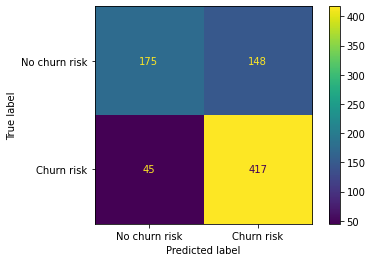

In [181]:
#Confusion matrix
label = ['No churn risk', 'Churn risk'] 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label)
disp.plot();

### Learning curves to test if we have enough data for a meaningful generalization


/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 4  6  7  8 22 26 30 33 34 60 62 63 64 65 66 67 70 71 82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered i

/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 8 33 34 60 62 63 64 65 66 70 71] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6] during transform. These

/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 8 33 60 71] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6] during transform. These unknown categories w

/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 8 33 60] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6] during transform. These unknown categories will

/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 8 33] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5] during transform. These unknown categories will be encod

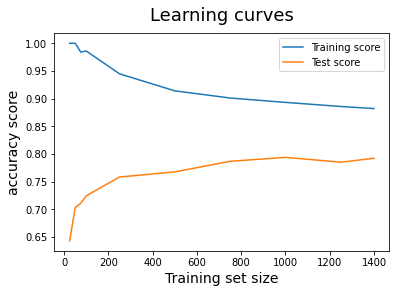

In [182]:
train_sizes= [25,50,75,100,250,500,750,1000,1250,1400]

train_sizes, train_scores, test_scores= learning_curve(
    estimator = best_search, X=X_train, y=y_train, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean= np.mean(train_scores, axis=1)
test_scores_mean= np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('accuracy score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()


### Test pipeline with a smaller select percentile : target is 3% of data points = 90 features






In [183]:
pipe_small = make_pipeline(preprocessor,CustomSelectPercentile(percentile=3), RidgeClassifier())

In [184]:
grid_search_small = GridSearchCV(
    pipe_small, 
    param_grid={
        'ridgeclassifier__solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
        'ridgeclassifier__alpha': [1,2,5],
        'ridgeclassifier__max_iter' : [1000]
    },
    cv=5,
    scoring="accuracy",
verbose=1, error_score='raise')


In [185]:
grid_search_small.fit(X_train, y_train)

grid_search_small.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [60] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered i

/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [60] a

/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 3, 4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in column

/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 3, 4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in column

/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 3, 4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all 

{'ridgeclassifier__alpha': 2,
 'ridgeclassifier__max_iter': 1000,
 'ridgeclassifier__solver': 'svd'}

In [186]:
grid_search_small.best_score_



0.7993457594131297

In [187]:
best_search_small = grid_search_small.best_estimator_


In [188]:
y_pred_small = best_search_small.predict(X_test)



/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [189]:
print(classification_report(y_test,y_pred_small,target_names=target_names))


              precision    recall  f1-score   support

    classe 0       0.82      0.53      0.64       323
    Classe 1       0.74      0.92      0.82       462

    accuracy                           0.76       785
   macro avg       0.78      0.72      0.73       785
weighted avg       0.77      0.76      0.75       785



In [190]:
cv_results_stacked_small = cross_validate(pipe_small, X_train, y_train, scoring='accuracy', cv=5)
cv_results_stacked_small


/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [60] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered i

{'fit_time': array([0.10927987, 0.12556553, 0.11877108, 0.10958838, 0.14099789]),
 'score_time': array([0.06688571, 0.06397057, 0.06209135, 0.05038285, 0.07008028]),
 'test_score': array([0.77868852, 0.78961749, 0.81693989, 0.79508197, 0.79452055])}

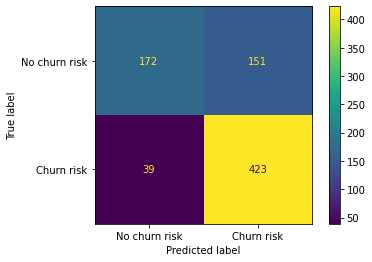

In [194]:
#Confusion matrix
label = ['No churn risk', 'Churn risk'] 
cm = confusion_matrix(y_test, y_pred_small)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label)
disp.plot();

/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 4  6  7  8 22 26 30 33 34 60 62 63 64 65 66 67 70 71 82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered i

/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 8 33 60 62 64 70 71] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 8 70 71] are constant.
  warnings.warn("Features %s are constant."

/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 8 60] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as 

/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, 

/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/clementine/.pyenv/versions/3.8.12/envs/marbotic/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


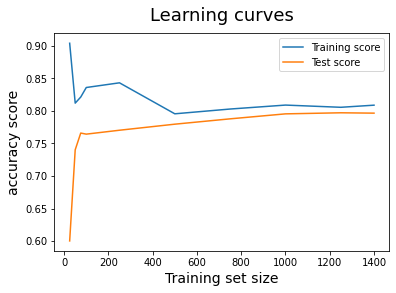

In [191]:
train_sizes= [25,50,75,100,250,500,750,1000,1250,1400]

train_sizes, train_scores, test_scores= learning_curve(
    estimator = best_search_small, X=X_train, y=y_train, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean= np.mean(train_scores, axis=1)
test_scores_mean= np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('accuracy score', fontsize = 14)

plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()



In [192]:
best_search_small.named_steps.keys()

dict_keys(['customcolumntransformer', 'customselectpercentile', 'ridgeclassifier'])

### Relative weight of feature selected by the model (ANOVA)

In [193]:
#Analyse de la variance des colonnes gardées
pd.DataFrame(best_search_small.named_steps["customselectpercentile"].scores_,index=best_search_small.named_steps["customselectpercentile"].feature_names_in_).sort_values(by=0,ascending=False)[:33]

,0
cat_tr__os_version_15.4.1,413.138580
num_tr__session_id,173.968612
cat_tr__start_version_2.0.5,120.027486
cat_tr__os_version_15.3.1,81.427498
num_tr__id,66.931772
cat_tr__start_version_2.0.4,64.510518
num_tr__last_game_event_type_Scene_Enter,61.706619
num_tr__average_since_su_time_since_last_session,58.750307
num_tr__last_game_game_events,45.079801
num_tr__event_type_Activity_Stop,42.513884


#session_id : count unique de nombre de sessions observées par user   #id : count unique d'events observés par user


## Remove users created before Jan22


## Split teachers & parents
